In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [8]:
data =pd.read_csv(r"D:\DATA SCIENCE\TASKS\Add_sales_data_2018.csv")
data

,Date,Ad1,Ad2,Ad3,Ad4,Ad5,Profit
0,10/8/2018,208.00,222.25,206.85,216.00,215.15,4093.065
1,10/5/2018,217.00,218.60,205.90,210.25,209.20,4042.448
2,10/4/2018,223.50,227.80,216.15,217.25,218.20,4213.819
3,10/3/2018,230.00,237.50,225.75,226.45,227.60,4391.665
4,10/1/2018,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,12/14/2017,288.00,288.25,279.20,284.50,284.30,5374.105
201,12/13/2017,290.00,292.50,282.20,284.80,284.45,5439.655
202,12/12/2017,298.60,298.60,286.65,287.45,287.80,5545.013
203,12/11/2017,290.00,299.55,285.90,297.85,298.35,5565.444


In [9]:
print (data.describe())

              Ad1         Ad2         Ad3         Ad4         Ad5       Profit
count  205.000000  205.000000  205.000000  205.000000  205.000000   205.000000
mean   267.577561  271.722439  262.990732  267.223902  267.152683  5059.630234
std     26.219588   25.914939   26.126704   26.238832   26.215360   486.910414
min    208.000000  218.600000  205.900000  210.250000  209.200000  4042.448000
25%    244.000000  248.500000  240.300000  243.050000  243.000000  4617.695000
50%    269.700000  274.200000  263.250000  268.900000  268.350000  5088.455000
75%    284.400000  288.800000  280.900000  284.500000  284.450000  5387.438000
max    327.700000  328.750000  321.650000  325.950000  325.750000  6137.800000


In [10]:
data.isna().sum()

Date      0
Ad1       0
Ad2       0
Ad3       0
Ad4       0
Ad5       0
Profit    0
dtype: int64

# 1. First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.


<AxesSubplot:>

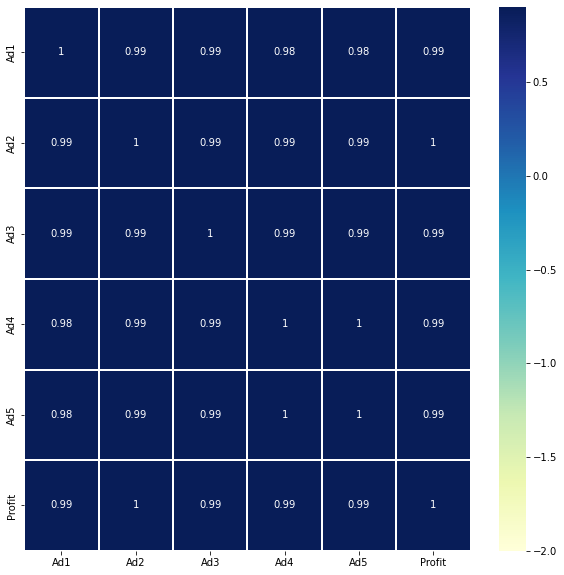

In [11]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=-2,vmax=.9,annot=True,linewidth=0.2,cmap='YlGnBu')

#### THERE IS VERY HIGH POSITIVE CORRELATION BETWEEN THE AMOUNT SPENT FOR ADVERTISEMENT AND PROFIT. AS THE AMOUNT SPENT INCREASE PROFITABILITY ALSO INCREASE

# 2. Build a regression model to predict the profit from the given data and
comment your findings on it

In [19]:
x=data.drop(['Profit', 'Date'], axis=1).values
y=data['Profit'].values

In [20]:
print(x)

[[208.   222.25 206.85 216.   215.15]
 [217.   218.6  205.9  210.25 209.2 ]
 [223.5  227.8  216.15 217.25 218.2 ]
 ...
 [298.6  298.6  286.65 287.45 287.8 ]
 [290.   299.55 285.9  297.85 298.35]
 [287.55 289.9  285.05 288.05 288.45]]


In [22]:
#split data set in training & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4, random_state=0)

In [23]:
#train model
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=ml.predict(x_test)

In [29]:
ml.predict([[208.00,222.25,206.85,216.00,215.15]])

array([4093.065])

In [30]:
#evaluate model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [32]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:10]

,Actual Value,Predicted Value,Difference
0,4494.144,4494.144,-2.728484e-12
1,5921.116,5921.116,0.000000e+00
2,4404.686,4404.686,-2.728484e-12
3,4190.965,4190.965,-2.728484e-12
4,5880.541,5880.541,0.000000e+00
5,5728.804,5728.804,-9.094947e-13
6,5225.140,5225.140,-9.094947e-13
7,5017.503,5017.503,-1.818989e-12
8,5518.561,5518.561,-9.094947e-13
9,4513.600,4513.600,-9.094947e-13


#### THE MODEL DEVELOPED FOR PREDICTION IS VERY STRONG AND THE DIFFERENCE BETWEEN ACTUAL AND PREDICTED VALUE IS VERY LESS

# 3. Predict the profit generated by the company, if they wish to spend the
following amount for advertisement. [290.00,312.00,309.00,298.00,320.00]

In [33]:
ml.predict([[290.00,312.00,309.00,298.00,320.00]])

array([5820.06])

### As per the model the predicted profit of the company is 5820.06 (in thousands) ie, 5820060